In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu', name='layer_1'),
    Dense(16, activation='relu', name='layer_2'),
    Dense(10, activation='softmax', name='output_layer')
])

# the above is the same as the below

# model = Sequential([
#     Flatten(input_shape=(28,28)),
#     Dense(16, activation='relu'),
#     Dense(16, activation='relu'),
#     Dense(10), # Default activation for the dense layer is linear
#     Softmax()
# ])



In [4]:
# Print the model summary

# model.weights ----> throws error if the below was used above
#model = Sequential([
#    Dense(16, activation='relu'),
#    Dense(16, activation='relu'),
#    Dense(10, activation='softmax')
#])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
layer_2 (Dense)              (None, 16)                272       
_________________________________________________________________
output_layer (Dense)         (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [11]:
# Build the Sequential convolutional neural network model

# Setting strides=2 sets the stride to 2 in every dimension in Conv2D
# Adding padding='SAME' keeps the dims same as the input shape in Conv2D
# By default, the data_format is 'channles_last', but it can also be 'channels_first' 

# model = Sequential([
#     Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='SAME', strides=2, data_format='channels_last'),
#     MaxPooling2D((3, 3)),
#     Flatten(),
#     Dense(10, activation='softmax')
# ])



model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(10, activation='softmax')
])


In [12]:
# Print the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [42]:
# Define the model optimizer, loss function and metrics

# model.compile(optimizer=tf.keras.optimizers.Adam(), # also use StochasticGradientDescent
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(), # also use just CategoricalCrossentropy
#               metrics=[tf.keras.metrics.BinaryAccuracy()]) # also use MeanAbsoluteError

# The above can also be written as:

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy', 
#               metrics=['accuracy']) 

# Some variations of the above are:

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy', 
              metrics=[acc, mae]) 


In [43]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7fae7453b080>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7fae7453b160>]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [44]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [45]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [46]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [47]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [48]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

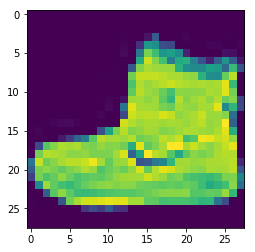

label: Ankle boot


In [49]:
# Display one of the images

i = 0
img = train_images[i, :, :]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

#### Fit the model

In [50]:
# Fit the model

# model.fit(train_images, train_labels, epochs=2, batch_size=256) -> gives an error because of the dimensions of the input array
# This sequential model has a channel dimension that we specified when defining the model. To solve the problem, just set a dummy channel dimension to the training images. 

history = model.fit(train_images[..., np.newaxis], train_labels, epochs=8, batch_size=256)

# setting verbose = 0 prints 0 lines per epoch, 1 prints 1 line per epoch, 2 prints 2 lines. Default is 2

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 53s 880us/sample - loss: 0.5997 - sparse_categorical_accuracy: 0.7871 - mean_absolute_error: 4.4200
Epoch 2/8
60000/60000 [==============================] - 52s 870us/sample - loss: 0.3881 - sparse_categorical_accuracy: 0.8645 - mean_absolute_error: 4.4200
Epoch 3/8
60000/60000 [==============================] - 52s 862us/sample - loss: 0.3537 - sparse_categorical_accuracy: 0.8748 - mean_absolute_error: 4.4200 - loss: 0.3555 - sparse_categorical_accuracy: 0.8744 - mean
Epoch 4/8
60000/60000 [==============================] - 50s 838us/sample - loss: 0.3403 - sparse_categorical_accuracy: 0.8800 - mean_absolute_error: 4.4200
Epoch 5/8
60000/60000 [==============================] - 50s 827us/sample - loss: 0.3237 - sparse_categorical_accuracy: 0.8847 - mean_absolute_error: 4.4200
Epoch 6/8
60000/60000 [==============================] - 50s 838us/sample - loss: 0.3152 - sparse_categorical_accuracy: 0.8876 - mea

#### Plot training history

In [51]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.599745,0.787100,4.420001
1,0.388099,0.864500,4.420001
2,0.353659,0.874833,4.420000
3,0.340340,0.880017,4.419999
4,0.323728,0.884667,4.420001


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

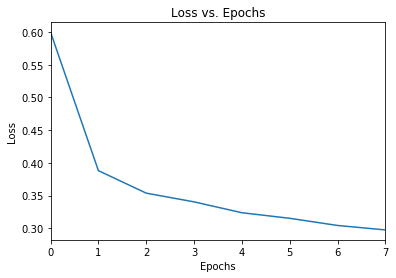

In [52]:
# Make a plot for the loss - loss function is supposed to decrease after each epoch

loss_plot = df.plot(y="loss", title="Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

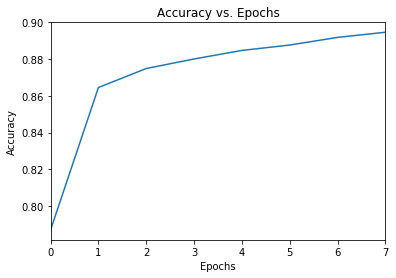

In [53]:
# Make a plot for the accuracy

accuracy_plot = df.plot(y="sparse_categorical_accuracy", title = "Accuracy vs. Epochs", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Error'), Text(0.5, 0, 'Epochs')]

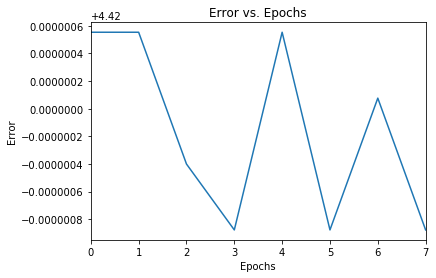

In [54]:
# Make a plot for the additional metric

error_plot = df.plot(y="mean_absolute_error", title = "Error vs. Epochs", legend=False)
error_plot.set(xlabel="Epochs", ylabel="Error")

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [55]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [57]:
# Evaluate the model

test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)

10000/1 - 6s - loss: 0.2878 - sparse_categorical_accuracy: 0.8816 - mean_absolute_error: 4.4200


#### Make predictions from the model

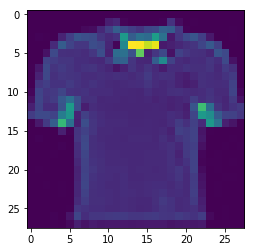

Label: T-shirt/top


In [61]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [62]:
# Get the model predictions

prediction = model.predict(test_image[np.newaxis, ..., np.newaxis])
print(f"Model prediction: {labels[np.argmax(prediction)]}")

Model prediction: T-shirt/top
